In [1]:
## data handling packages and visulations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## machine learning packages
from sklearn.pipeline import make_pipeline ## quickly assembles a pipeline without needing to manually name each step.
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor ## ensemble machine learning packages
from sklearn.preprocessing import LabelEncoder, StandardScaler ## data transformation. encode string variables and standardise features in dataset
from sklearn.model_selection import train_test_split ## train, test data. random state = 42 by default
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV ## linear regression models. at the end we use elasticnet which is combines ridge and lasso
from xgboost import XGBRegressor ## xgb regression model
from sklearn.model_selection import cross_val_score ## Runs cross-validation for a given model and returns scores such as accuracy, RMSE) for each fold.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ## to check model' accuracy
from sklearn.inspection import permutation_importance ## identify feature importance

In [2]:
## Load datasets
df1950 = pd.read_csv("C:/DataSets/1950.csv") ## 1950
df1960 = pd.read_csv("C:/DataSets/1960.csv") ## 1960
df1970 = pd.read_csv("C:/DataSets/1970.csv") ## 1970
df1980 = pd.read_csv("C:/DataSets/1980.csv") ## 1980
df1990 = pd.read_csv("C:/DataSets/1990.csv") ## 1990
df2000 = pd.read_csv("C:/DataSets/2000.csv") ## 2000
df2010 = pd.read_csv("C:/DataSets/2010.csv") ## 2010

In [3]:
## Since data columns are identical, we easily can merge (union SQL-like) datasets into one.
frames = [df1950, df1960, df1970, df1980, df1990, df2000, df2010]
df = pd.concat(frames)
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


The dataset comprises information about a collection of songs. Each row represents a different song, with key columns detailing the song’s title, artist, genre, and year of release. Additional features include musical attributes such as beats per minute (bpm), energy (nrgy), danceability (dnce), loudness (dB), and acousticness (acous). There are also metrics like liveliness (live), valence (val), speechiness (spch), and popularity (pop), alongside the song’s duration in seconds (dur).

Notably, the dataset spans multiple decades, featuring well-known artists like Paul Anka, Doris Day, Dean Martin, and Dion & The Belmonts. The presence of both older songs back to the 1940s and 1950s and more recent releases or remasters highlights the enduring popularity of these tracks. The musical characteristics suggest most songs are moderately paced, relatively acoustic, and not especially high-energy, reflecting the laid-back and melodic qualities typical of the genres presented in the dataset. Overall, the dataset provides a comprehensive overview of classic songs, useful for analysing trends in musical style, artist popularity, and evolving preferences in the adult standards genre

In [4]:
row_count1 = len(df)
print(row_count1)

667


In [5]:
null_df = df[df.isnull().any(axis=1)]
print(null_df)

    Number                         title                            artist  \
31      32     If I Give My Heart To You                   The Teddy Bears   
32      33           The Lady Is A Tramp         Mel Torme & the Mel-Tones   
42      43              Unchained Melody                   The Teddy Bears   
50      51           Someone Elses Roses                        Joan Regan   
57      58                 No Other Love          Bob Sharples & His Music   
58      59                   Hot Diggity                        Stargazers   
65      66     Little Things Means A Lot                   Jayne Mansfield   
66      67           Drinks On The House                Green Martini Keys   
67      68                   Pachuko Hop           Ike Carpenter Orchestra   
69      70  Happy Days And Lonely Nights  Suzi Miller And Johnson Brothers   
70      71              Stairway Of Love                        Terry Dene   
71      72           I've Waited So Long                    Anth

In [6]:
row_count = len(null_df)
print(row_count)

16


We got 16 rows out of 667 that contain null values in "top genre" column.  

In [7]:
unique_values = df['top genre'].unique()

print(unique_values)

['adult standards' 'brill building pop' 'doo-wop' 'deep adult standards'
 'british comedy' nan 'classic soul' 'louisiana blues'
 'british dance band' 'merseybeat' 'yodeling' 'classic uk pop'
 'british invasion' 'album rock' 'baroque pop' 'blues rock' 'art rock'
 'rock-and-roll' 'chanson' 'australian rock' 'classic rock'
 'canadian folk' 'alternative country' 'acoustic blues' 'art pop'
 'classic girl group' 'bubblegum pop' 'blues' 'american folk revival'
 'bebop' 'beach music' 'appalachian folk' 'cowboy western' 'drone folk'
 'british folk' 'boogaloo' 'avant-garde jazz' 'afropop' 'british blues'
 'afrobeat' 'australian talent show' 'glam rock' 'europop' 'hollywood'
 'soft rock' 'pop' 'disco' 'country' 'dance rock' 'classic country pop'
 'chicago soul' 'brit funk' 'country rock' 'dance pop' 'native american'
 'glam metal' 'new wave pop' 'mellow gold' 'hi-nrg' 'glam punk' 'bow pop'
 'eurodance' 'alternative rock' 'classic danish pop' 'jazz fusion'
 'bronx hip hop' 'british soul' 'atl hip 

In [8]:
most_popular_per_year = df.loc[df.groupby('year')['pop'].idxmax()]
print(most_popular_per_year[['year', 'title', 'artist', 'pop']])

    year                                              title         artist  \
12  1945  If I Give My Heart to You (with The Mellomen) ...      Doris Day   
12  1969                                     Pinball Wizard        The Who   
12  1979                              How Deep Is Your Love       Bee Gees   
12  1984                                             Heaven    Bryan Adams   
12  1996                                 Return of the Mack  Mark Morrison   
..   ...                                                ...            ...   
0   1975                       Bohemian Rhapsody - 2011 Mix          Queen   
0   1986                                 Livin' On A Prayer       Bon Jovi   
0   1999                                          No Scrubs            TLC   
0   2000                                         In the End    Linkin Park   
0   2019                                            bad guy  Billie Eilish   

    pop  
12   52  
12   69  
12   77  
12   76  
12   72  
.. 

It seems that the highest pop has song "bad guy" made by Billie Eilish having pop 94.

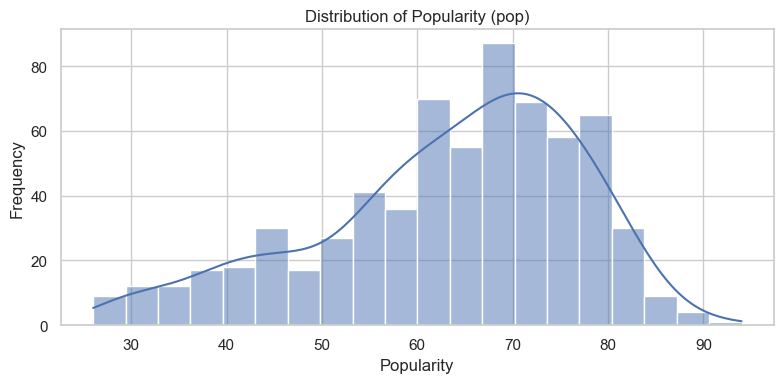

In [9]:
## Pseudocode:

## 1. Set the visual style of the plot to 'whitegrid'
## 
## 2. Create a new figure with size 8 by 4 inches
## 
## 3. Plot a histogram of the 'popularity' column:
##    - Use 20 bins (intervals)
##    - Also show a smooth curve (KDE) to represent the distribution
## 
## 4. Add a title: "Distribution of Popularity (pop)"
## 
## 5. Label the x-axis as "Popularity"
## 
## 6. Label the y-axis as "Frequency"
## 
## 7. Adjust layout to fit everything nicely
## 
## 8. Display the plot on screen


# 1. Distribution of Popularity
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(df['pop'], bins=20, kde=True)
plt.title('Distribution of Popularity (pop)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

A histogram of pop shows a right-skewed distribution, where most songs cluster around lower popularity scores, and relatively few achieve very high values. This suggests the presence of outliers, likely reflecting hit songs that gained exceptional popularity.

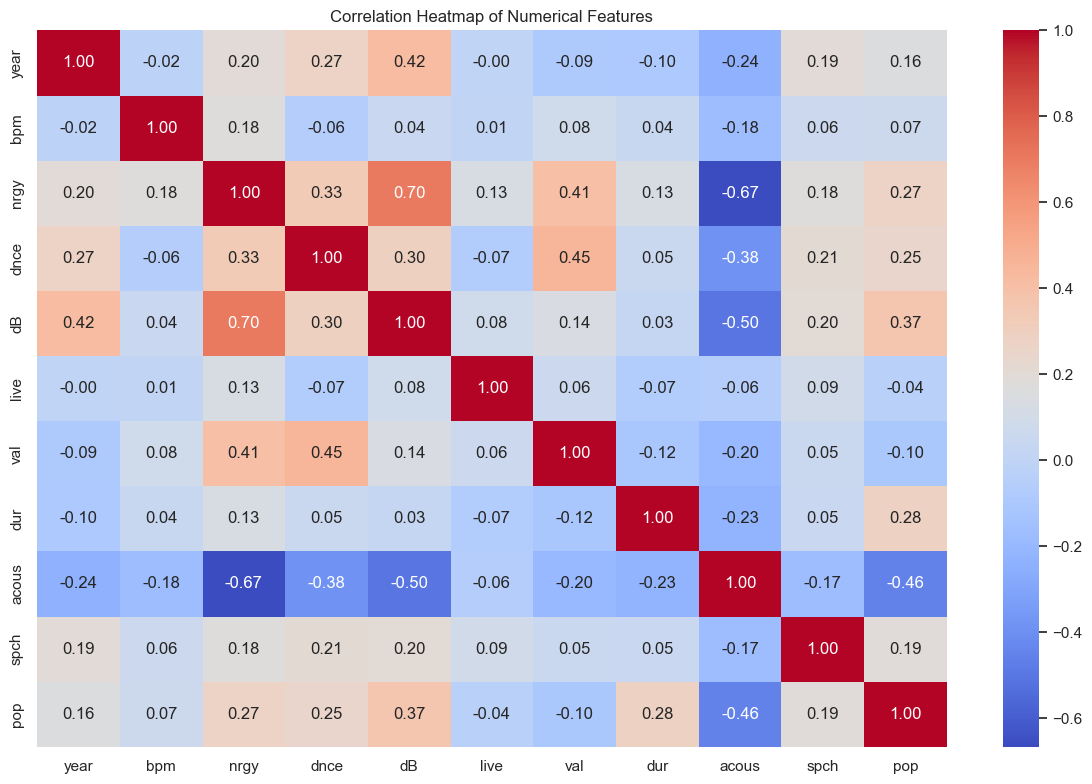

In [10]:
## Corelattion matrix between all variables except for top genre as it is string.

## Pseudocode:
## 1. Get all columns in the df that are numeric types, except for the column named 'Number' and 'top genre' 
## as it is presented in string format
## 2. From the dataframe df, we select only these numeric columns.
## 3. Calculate the correlation matrix for these columns using built-in command corr()
## 4. Create a figure for plotting, set the size. We use plt and sns packages.
## 5. Draw a heatmap of the correlation matrix

numeric_cols = df.select_dtypes(include='number').drop(columns=['Number']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

A correlation heatmap of the numerical features reveals low to moderate correlations. For instance, nrgy and dnce show a weak positive correlation with pop, indicating that more energetic and danceable tracks tend to be slightly more popular. On the contrary, acous is negatively correlated with popularity, suggesting that highly acoustic songs are generally less popular. However, none of the correlations exceed positively or negatatively 0.4 implying that no single audio feature has a dominant linear relationship with popularity.

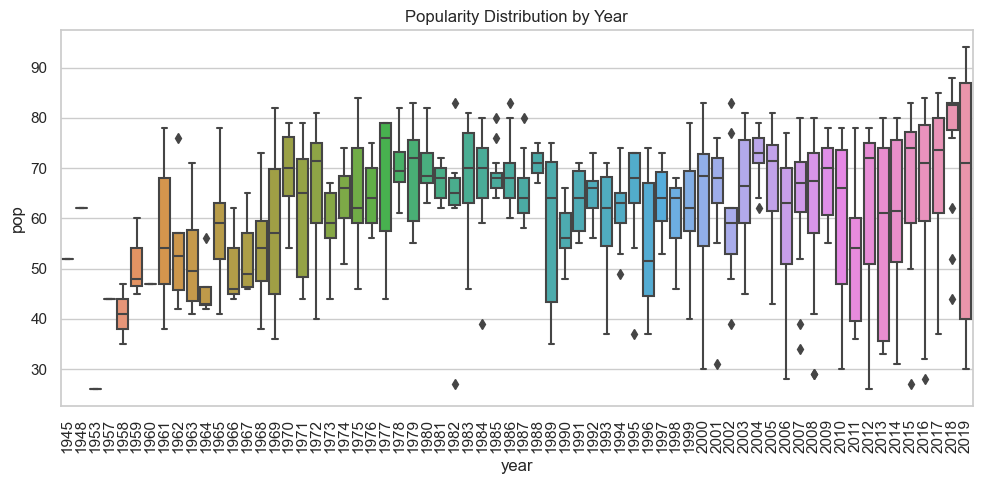

In [11]:
# Popularity over Years

## Pseudocode:

## 1. Create a new figure with size 10 by 5 inches
## 
## 2. Draw a boxplot:
##    - Use 'year' on the x-axis
##    - Use 'popularity' on the y-axis
##    - Data comes from the dataset df 
## 
## 3. Rotate the x-axis labels to 90 degrees for better readability
## 
## 4. Add a title: "Popularity Distribution by Year"
## 
## 5. Adjust the layout so all elements fit well
## 
## 6. Show the plot on the screen

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='year', y='pop')
plt.xticks(rotation=90)
plt.title('Popularity Distribution by Year')
plt.tight_layout()
plt.show()

Boxplots of pop across years display variation in central tendency and spread over time. There is a noticeable increase in both median popularity and the interquartile range in more recent decades, possibly due to changes in the music industry and digital streaming patterns.

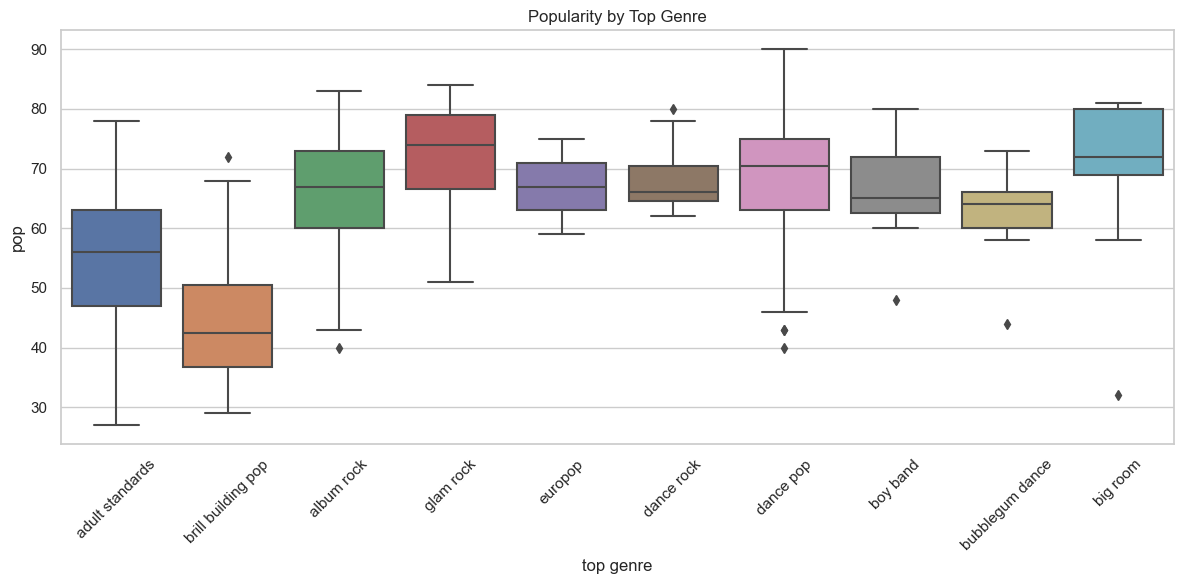

In [12]:
## Boxplot of popularity (y-axis) and the most frequent genres (x-axis)
 
## Pseudocode:

## 1. Find the 10 most popular values in the 'top genre' column
## 2. Keep only the rows where 'top genre' is in that top 10 list
## 3. Create a boxplot: x-axis = top genre, y-axis = popularity
## 4. Rotate x-axis labels for readability
## 5. Add a title and adjust layout
## 6. Show the plot
top_genres = df['top genre'].value_counts().nlargest(10).index
df_top_genres = df[df['top genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_genres, x='top genre', y='pop')
plt.xticks(rotation=45)
plt.title('Popularity by Top Genre')
plt.tight_layout()
plt.show()

In [13]:
## We drop missing values
df_clean = df.dropna(subset=['top genre'])  # Drop missing genre
df_encoded = df_clean.copy()
df_encoded

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [14]:
## Identify top genres over all years
top_genre_counts = df_encoded['top genre'].value_counts().head(10)
top_genre_counts

top genre
dance pop             114
adult standards        93
album rock             77
glam rock              23
brill building pop     20
europop                17
dance rock             15
boy band               15
big room               13
bubblegum dance        13
Name: count, dtype: int64

Analysis by top genre reveals significant genre-dependent variability. A boxplot comparing the ten most common genres shows that genres like “dance pop” and “pop rap” have higher median popularity, while others like “adult standards” are associated with lower scores. These differences highlight the importance of categorical encoding and genre stratification in modelling tasks.

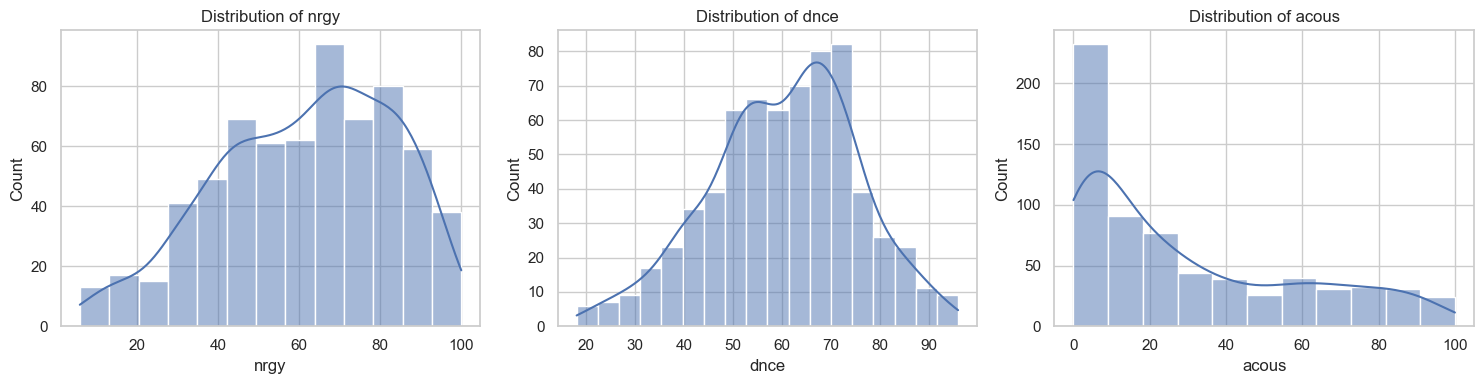

In [15]:
## Distribution of other attributes presented in the dataset

features_to_plot = ['nrgy', 'dnce', 'acous']
plt.figure(figsize=(15, 4))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The distribution of nrgy is skewed towards the higher end of the scale. Most songs in the dataset have relatively high energy, which aligns with popular trends in mainstream music—especially in the dance, pop, and hip-hop genres. The peak around the upper range suggests that upbeat and energetic tracks are more commonly produced and/or included in this dataset.

The dnce feature also follows a similar pattern, with a noticeable skew towards higher values. This indicates that a large portion of the songs are designed to be rhythmically engaging and suitable for dancing. The presence of a unimodal peak near the upper quartile reflects the dominance of genres that prioritise rhythm and tempo.

In contrast, acous shows a bimodal distribution, suggesting a clear division between highly acoustic songs (e.g., ballads, acoustic covers) and more electronic or digitally produced tracks. This could imply that the dataset contains two distinct categories of production style: one that emphasises organic, instrumental sound, and another that favours modern, synthesised elements.

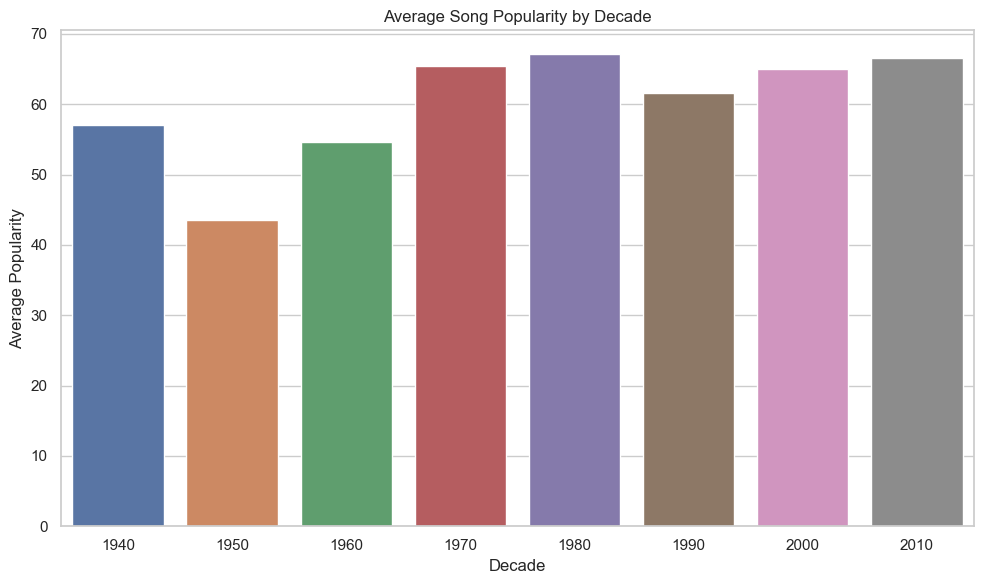

In [16]:
## 1. Create a new column called 'decade' by rounding each year down to the nearest decade
## 
## 2. Group the data by 'decade' and calculate the average popularity for each group
## 
## 3. Create a new figure with size 10 by 6 inches
## 
## 4. Draw a bar chart:
##    - X-axis: decades
##    - Y-axis: average popularity
##    - Data comes from the grouped table
## 
## 5. Add a title: "Average Song Popularity by Decade"
## 
## 6. Label the y-axis as "Average Popularity"
## 
## 7. Label the x-axis as "Decade"
## 
## 8. Adjust layout to fit all elements nicely
## 
## 9. Display the plot on the screen



df_encoded['decade'] = (df_encoded['year'] // 10) * 10

# Compute average popularity by decade
popularity_by_decade = df_encoded.groupby('decade')['pop'].mean().reset_index()

# Plot average popularity by decade
plt.figure(figsize=(10, 6))
sns.barplot(data=popularity_by_decade, x='decade', y='pop')
plt.title('Average Song Popularity by Decade')
plt.ylabel('Average Popularity')
plt.xlabel('Decade')
plt.tight_layout()
plt.show()

The data was first transformed by creating a new variable, decade, derived by rounding down each song’s release year to the nearest decade. This allows for temporal aggregation, helping us observe long-term trends without being overwhelmed by year-to-year fluctuations.

From the visualisation, we see a gradual increase in average popularity across more recent decades. Songs released in the 1970s- 2010s tend to have noticeably higher mean popularity scores compared to those from the mid-20th century. This could reflect several factors, including the rise of digital streaming platforms, changes in how popularity is measured, or simply a data collection bias favouring newer tracks.

Statistically, the use of the mean provides a general central tendency, but it may be influenced by high-scoring outliers in the modern music era. Still, the overall trend is evident and suggests a shift in either production standards or audience engagement.

In [17]:
df_encoded['genre_prefix'] = df_encoded['top genre'].astype(str).str.extract(r'^(pop|rock)', expand=False)
df_encoded['is_pop'] = df_encoded['top genre'].str.contains('pop', case=False, na=False)
df_encoded['is_rock'] = df_encoded['top genre'].str.contains('rock', case=False, na=False)


In [18]:
pop_by_genre = df_encoded.groupby('is_pop')['pop'].mean()
print(pop_by_genre)
dnc_by_genre = df_encoded.groupby('is_pop')['dnce'].mean()
print(dnc_by_genre)

is_pop
False    62.676404
True     66.694175
Name: pop, dtype: float64
is_pop
False    58.586517
True     64.631068
Name: dnce, dtype: float64


                    pop       dnce
genre_prefix                      
pop           76.909091  59.636364
rock          60.000000  52.000000


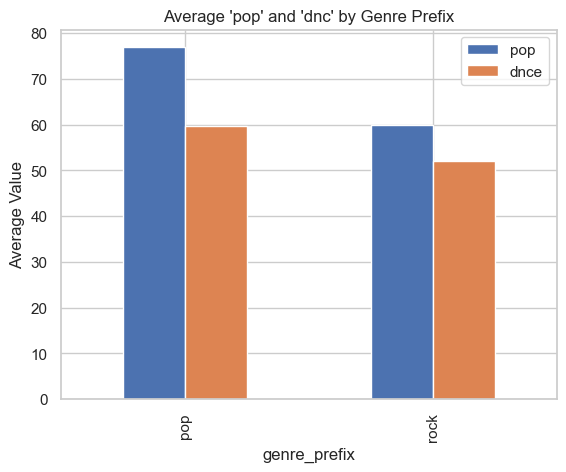

In [19]:
means = df_encoded.groupby('genre_prefix')[['pop', 'dnce']].mean()
print(means)
means.plot(kind='bar')
plt.title("Average 'pop' and 'dnc' by Genre Prefix")
plt.ylabel('Average Value')
plt.show()

The genre_prefix variable is created by extracting the prefix "pop" or "rock" from the top genre column using a regular expression (regex SQL-like). Two new binary variables, is_pop and is_rock, are also created to allow for grouped analysis. These transformations support categorical comparisons using group-based descriptive statistics.

The results show that songs classified as pop where is_pop = True tend to have higher average popularity and higher danceability than songs outside the pop category. This suggests that pop music is not only more commercially successful but also rhythmically oriented—characteristics likely associated with broader listener appeal.

Further, by aggregating both pop and dnce based on genre_prefix, the bar chart visually compares these metrics between pop and rock songs. It reveals that pop tracks outperform rock tracks in both metrics on average, highlighting stylistic and market-based differences between the two genres.

In [20]:
label_enc = LabelEncoder()
df_encoded['top genre'] = label_enc.fit_transform(df_encoded['top genre'])
features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'top genre', 'year']
X = df_encoded[features]
y = df_encoded['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Firstly, the categorical variable top genre is transformed using label encoding, which converts text labels into numeric values. This approach is appropriate for algorithms that require numerical input, although it does impose an ordinal structure that may not reflect true genre relationships. For more complex models or if genre similarity matters, one-hot encoding could be a more accurate alternative.

A feature matrix X is then constructed using 11 selected variables, including musical and temporal features such as bpm (tempo), nrgy (energy), dnce (danceability), val (valence), and year. These predictors are expected to influence the target variable, pop (popularity), which is defined as y. The features represent a combination of audio signal characteristics and production qualities (e.g., loudness in dB, duration)..

To evaluate further model, the data is split into training and test sets using the train_test_split function from scikit-learn. This divides the dataset into two non-overlapping sets: one for fitting the model and another for evaluating its performance on unseen data. The use of random_state=42 ensures that the split is reproducible, maintaining consistency in experimental results. According to resources such as https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b , https://www.researchgate.net/post/Why_random_state_in_train_test_split_is_equal_42 random_state = 42 is widely acceptable in machine learning. 

I chose to work on the regression task, which involves predicting the popularity score of a song. My main motivation is that this can have real-world value for people in the music industry. By finding patterns in the data, we can help artists, producers, and others understand what makes a song more likely to become popular. In this project, I will use both basic and advanced regression models to see which ones work best for this problem.

In [21]:
## Pseudocode:

## 1. Standardise the data and train a Lasso regression model with cross-validation
## 2. After training, we extract the Lasso model and save its feature coefficients
## 
## 3. Do the same for a Ridge regression model
##    - Standardise, train with cross-validation
##    - Extract the trained model and its coefficients
## 
## 4. Repeat for an ElasticNet regression model
##    - Standardise, train, extract, and save coefficients
## 
## 5. For each model (Lasso, Ridge, ElasticNet):
##   - Link coefficients to feature names for comparison



## Lasso model

lasso_pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42)  
)
lasso_pipeline.fit(X_train, y_train)
lasso_model = lasso_pipeline.named_steps['lassocv']  


## Ridge model
ridge_pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(cv=5)
)
ridge_pipeline.fit(X_train, y_train)
ridge_model = ridge_pipeline.named_steps['ridgecv']

# ElasticNet model
elastic_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, random_state=42)
)
elastic_pipeline.fit(X_train, y_train)
elastic_model = elastic_pipeline.named_steps['elasticnetcv']

# Extract coefficients
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns, name='Lasso')
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns, name='Ridge')
elastic_coefs = pd.Series(elastic_model.coef_, index=X.columns, name='ElasticNet')

ridge_coefs, elastic_coefs, lasso_coefs

(bpm          0.395191
 nrgy        -2.305120
 dnce         2.266481
 dB           3.711362
 live        -0.094099
 val         -2.633364
 dur          1.703159
 acous       -4.553222
 spch         0.625662
 top genre    1.844179
 year        -1.204073
 Name: Ridge, dtype: float64,
 bpm          0.338541
 nrgy        -1.959437
 dnce         2.181842
 dB           3.436807
 live        -0.074736
 val         -2.594269
 dur          1.680784
 acous       -4.375106
 spch         0.597333
 top genre    1.811485
 year        -1.025824
 Name: ElasticNet, dtype: float64,
 bpm          0.292998
 nrgy        -2.167212
 dnce         2.190682
 dB           3.570085
 live        -0.009451
 val         -2.594224
 dur          1.670628
 acous       -4.553828
 spch         0.545899
 top genre    1.804535
 year        -1.058108
 Name: Lasso, dtype: float64)

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds a penalty proportional to the absolute value of the coefficients 1 norm to the cost function. This tends to set some weights exactly to zero, effectively performing feature selection and resulting in sparse models 

$$
 J(\theta)\ =\ MSE()\ =\ a\sum_{n=1}^{i}\theta_i^2\ 
$$

. Meanwhile, Ridge Regression is a regularised version of linear regression that adds a penalty proportional to the square of the magnitude of the coefficients norm to the cost function. This helps prevent overfitting by keeping the model weights small. The regularization strength is controlled by a hyperparameter a. The cost function is:

$$
J(\theta)\ =\ MSE()\ =\ a\frac{1}{2}\sum_{n=1}^{i}\theta_i^2
$$

On the other hand, Elastic Net combines both l1 and l2 regularization, mixing the penalties from Ridge and Lasso. It is controlled by a mixing parameter r where r=0r = 0r=0 is Ridge, r=1r = 1r=1 is Lasso, and values in between give a mix. The cost function is:

$$
J(\theta)\ =\ MSE()\ =\ ra\sum_{i=1}^{n}\left|\theta_i\right|+\frac{(1-r)}{2}a\sum_{i=1}^{n}\theta_i^2
$$ 

All three models are built using scikit-learn’s make_pipeline, which combines feature scaling (via StandardScaler) with the regression estimator. Scaling is essential for regularised models because the penalties are sensitive to the scale of the predictors. Each model is trained using cross-validation (cv=5), which helps in choosing the optimal regularisation strength (alpha) by evaluating performance across different folds of the training data. This improves model robustness and reduces the risk of overfitting to any particular subset.The final line extracts and stores the fitted coefficients from each model into pandas Series objects, aligned with the original feature names.

Each value in the output is a regression coefficient associated with a feature. It represents the change in predicted song popularity (pop) for a one-unit increase in that feature, assuming all others are held constant. Across all three models, some trends remain stable. For instance, dB (loudness) and dnce (danceability) consistently show positive coefficients across models, indicating that louder and more danceable songs tend to be more popular. Also, acous (acousticness) has a strong negative coefficient, suggesting that acoustic songs are generally less popular in this dataset. Val (valence), which measures musical positivity, also has a negative coefficient — perhaps indicating that darker or less upbeat tracks perform better in this sample whereas nrgy (energy) shows a consistent negative influence, which might suggest that very intense tracks do not always correlate with mass appeal.

Other features like dur (duration), spch (speechiness), and top genre contribute positively, but with more modest weights. It is worth to note that year has a negative coefficient, which might seem counterintuitive. This could reflect how popularity was measured or sampled over time or perhaps genre shifts in recent years.

Lasso (with its L1 penalty) produces slightly sparser coefficients, reducing some values close to zero (-0.009). This reinforces Lasso tendency to simplify models by excluding less informative variables. On the other hand, Ridge and ElasticNet maintain all variables but shrink their influence, making them more robust when features are correlated.

In [22]:
# Predictions
y_pred_lasso = lasso_pipeline.predict(X_test)
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_elastic = elastic_pipeline.predict(X_test)

In [23]:
## Pseudocode:
## 1. Define a function to evaluate a model:
##    - Input: model name, true values, predicted values
##    - Output: dictionary with R2 Score, MAE, and RMSE
## 
## 2. Use this function to evaluate three models:
##    - Lasso
##    - Ridge
##    - ElasticNet
## 
## 3. Store all results in a table (DataFrame)
## 
## 4. Sort the table by R2 Score from highest to lowest to see which model performs best


def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False)
    }

results = [
    evaluate_model("Lasso", y_test, y_pred_lasso),
    evaluate_model("Ridge", y_test, y_pred_ridge),
    evaluate_model("ElasticNet", y_test, y_pred_elastic)
]

performance_df = pd.DataFrame(results)

performance_df.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MAE,RMSE
2,ElasticNet,0.277387,9.249088,11.407255
0,Lasso,0.275231,9.263416,11.424259
1,Ridge,0.274945,9.261297,11.426518


The table presents the R2 score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for each model, which shows how model perfoms.

The R2 score measures the proportion of variance in the target variable (pop) explained by the model. Here, all three models perform similarly, with ElasticNet scoring highest (0.277), followed closely by Lasso and Ridge. These values indicate that around 27–28% of the variation in song popularity can be explained by the selected features—suggesting that model captures some features and it is right in 1/4 cases.

The MAE gives the average size of the prediction error in absolute terms, while RMSE penalises larger errors more heavily. Again, ElasticNet performs slightly better (with the lowest MAE and RMSE), though the differences are marginal. All three models have MAEs around 9.25, meaning on average, predictions are off by around 9 popularity points.

The similarity in performance suggests that the regularisation method does not dramatically impact accuracy with the current features. However, ElasticNet’s slight edge may be due to its ability to handle correlated predictors more effectively by combining L1 and L2 penalties

In [24]:
## Pseudocode:

## 1. Choose the most important features (e.g. loudness, acousticness, duration, etc.)
## 
## 2. Split the data using only these key features into training and test sets
## 
## 3. Train a Lasso regression model using the key features
##    - Predict on test data
## 
## 4. Train a Ridge regression model using the key features
##    - Predict on test data
## 
## 5. Train an ElasticNet regression model using the key features
##    - Predict on test data
## 
## 6. Evaluate all three models using metrics:
##    - R2 Score
##    - Mean Absolute Error (MAE)
##    - Root Mean Squared Error (RMSE)
## 
## 7. Compare model results in a table and sort by highest R2 Score



# Choose the most important feature
crucial_features = ['acous', 'dB', 'val', 'dnce', 'nrgy', 'top genre', 'dur', 'year']

# Split the data using only these key features into training and test set
X_crucial = df_encoded[crucial_features]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_crucial, y, random_state=42)

# Rebuild and evaluate Lasso
lasso_c = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
lasso_c.fit(X_train_c, y_train_c)
y_pred_lasso_c = lasso_c.predict(X_test_c)

# Rebuild and evaluate Ridge
ridge_c = make_pipeline(StandardScaler(), RidgeCV(cv=5))
ridge_c.fit(X_train_c, y_train_c)
y_pred_ridge_c = ridge_c.predict(X_test_c)

# Rebuild and evaluate ElasticNet
elastic_c = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=42))
elastic_c.fit(X_train_c, y_train_c)
y_pred_elastic_c = elastic_c.predict(X_test_c)

# Evaluate all
results_crucial = [
    evaluate_model("Lasso (key features)", y_test_c, y_pred_lasso_c),
    evaluate_model("Ridge (key_features)", y_test_c, y_pred_ridge_c),
    evaluate_model("ElasticNet (key_features)", y_test_c, y_pred_elastic_c)
]

pd.DataFrame(results_crucial).sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MAE,RMSE
2,ElasticNet (key_features),0.260022,9.357242,11.543509
1,Ridge (key_features),0.259542,9.360050,11.547252
0,Lasso (key features),0.256677,9.373836,11.569570


In this step, the dataset is reduced to include only eight carefully selected features that were previously identified as having the greatest influence on song popularity. These include audio characteristics such as acous, dB, val, dnce, and nrgy, with top genre, dur and year. The aim is to investigate whether a simplified model using only high-impact predictors can still produce similar results even overall model' perfomance is below average.

Three regularised regression models—Lasso, Ridge, and ElasticNet—were retrained using this smaller feature set and evaluated on the test data.

The results show a small decline in R2 scores compared to the full-feature models. All three achieve approximately 0.26–0.26 R2, meaning around 26% of the variability in popularity is explained. This is slightly lower than the earlier full-model values (0.27–0.28), the differences are minimal. This suggests that the selected features retain most of the predictive signal, while reducing potential noise.

In [25]:
## Pseudocode:

## 1. Create a list of remaining features not already in the key feature set
## 
## 2. For each remaining feature:
##    Add the feature to the key feature set
##    Prepare the training and test datasets
##    Train an ElasticNet model using this new feature set
##    Make predictions on the test set
##    Evaluate the model's performance (R2, MAE, RMSE)
##    Record the performance along with the added feature
## 
## 3. After testing all features:
##     Combine all results into a table
##     Sort the table by R2 Score (best to worst)
##     Identify which feature improves the model most



# Try adding one feature at a time from the remaining features not in the crucial set
remaining_features = [f for f in X.columns if f not in crucial_features]

# Store results
additional_feature_results = []

for feature in remaining_features:
    trial_features = crucial_features + [feature]
    X_trial = df_encoded[trial_features]
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_trial, y, random_state=42)

    # ElasticNet model with additional feature
    trial_model = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=42))
    trial_model.fit(X_train_t, y_train_t)
    y_pred_trial = trial_model.predict(X_test_t)

    # Evaluate
    result = evaluate_model(f"ElasticNet (+{feature})", y_test_t, y_pred_trial)
    result["Added Feature"] = feature
    additional_feature_results.append(result)

# Present sorted improvements
additional_feature_df = pd.DataFrame(additional_feature_results).sort_values(by="R2 Score", ascending=False)
additional_feature_df

,Model,R2 Score,MAE,RMSE,Added Feature
2,ElasticNet (+spch),0.273439,9.291403,11.438374,spch
0,ElasticNet (+bpm),0.262887,9.330907,11.521136,bpm
1,ElasticNet (+live),0.260743,9.353323,11.537882,live


Since ElasticNet perfoms the best, we want to determine whether any of the remaining features can enhance the ElasticNet model.

Spch yields the highest improvement, pushing the R2 to 0.273. It is very close to the full-feature ElasticNet model (0.277). Nonetlhess, bpm also improves performance slightly (R2 = 0.263), indicating that song tempo may have a minor but non-negligible influence on popularity. At the meantime, live contributes the least with R2 = 0.261. Altough it is still marginally better than the baseline model without it.

In [26]:
## Pseudocode:

## 1. Define three ensemble models:
##    - XGBoost Regressor
##    - Gradient Boosting Regressor
##    - Random Forest Regressor
## 
## 2. Train each model on the training data
## 
## 3. Use each trained model to predict on the test data
## 
## 4. Evaluate each model using:
##    - R2 Score
##    - MAE
##    - RMSE
## 
## 5. Add these results to the earlier linear model results (Lasso, Ridge, ElasticNet)
## 
## 6. Combine all results into a table
## 
## 7. Sort the table by R2 Score to find which model performs best



xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

xgb.fit(X_train, y_train)
gbr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate
results_ensemble = [
    evaluate_model("XGBoost", y_test, y_pred_xgb),
    evaluate_model("GradientBoosting", y_test, y_pred_gbr),
    evaluate_model("RandomForest", y_test, y_pred_rf)
]
# Combine with previous linear models
all_results = performance_df.to_dict('records') + results_ensemble
full_comparison_df = pd.DataFrame(all_results).sort_values(by="R2 Score", ascending=False)

full_comparison_df

,Model,R2 Score,MAE,RMSE
5,RandomForest,0.456703,7.937853,9.891153
3,XGBoost,0.418667,8.064685,10.231533
4,GradientBoosting,0.371120,8.381875,10.641731
2,ElasticNet,0.277387,9.249088,11.407255
0,Lasso,0.275231,9.263416,11.424259
1,Ridge,0.274945,9.261297,11.426518


Gradient boosting is an ensemble learning technique where models are built sequentially, with each new model correcting the errors of the previous one. Typically using decision trees as base learners, Gradient Boosting minimises a loss function by fitting each subsequent tree to the residuals of the previous ensemble. The learning rate controls how much each tree contributes, with lower rates requiring more trees but often resulting in better generalisation. Meanwhile, random Forest is an ensemble method that constructs multiple decision trees, typically using bootstrapped samples of the data and random subsets of features at each split. The predictions from all the trees are aggregated—by majority voting for classification or averaging for regression. This approach helps to reduce variance and overfitting, resulting in robust models that perform well on a wide range of tasks. XGBoost, short for Extreme Gradient Boosting, is an advanced and efficient implementation of gradient boosted trees. It includes several enhancements such as regularisation, early stopping, and advanced tree pruning techniques, which make it more robust and less prone to overfitting. XGBoost is renowned for its speed and performance, handling missing data natively and supporting parallel processing


We use these ensemble-based regression models. These were trained and evaluated. These models were compared directly against earlier linear models (Lasso, Ridge, ElasticNet) using standard regression evaluation metrics.
Random Forest performs best overall, with the highest R2 score (0.457), and the lowest MAE and RMSE. This means it explains about 45.7% of the variance in song popularity. Compared to a liner model, this is a significant improvement over the linear models. Furthermore, XGBoost and Gradient Boosting also perform well, both surpassing linear regressors by a notable margin. In contrast, linear models (ElasticNet, Lasso, Ridge) hover around 0.27–0.28 R2, which indicates that they fail to capture the complexity present in the data.

Note, we use the smallest learning_rate (0.1). Small learning_rate makes the model learn more slowly but usually improves generalisation and reduces the risk of overfitting.

In [27]:
## Pseudocode:

## 1. Add 'spch' to your list of most important features
## 
## 2. Split your dataset (with only these features) into training and testing sets
## 
## 3. Create three ensemble models with specific settings:
##    XGBoost: 100 trees, max depth 4, learning rate 0.1
##    Gradient Boosting: 100 trees, max depth 3, learning rate 0.1
##    Random Forest: 100 trees, max depth 10
## 
## 4. Train each model on the training data
## 
## 5. Predict on the test data using each model
## 
## 6. Evaluate model predictions using:
##    R2 Score
##    MAE
##    RMSE
## 
## 7. Store the results in a table
## 
## 8. Sort the table by R2 Score to find the best performing model



# Use the key feature set including 'spch'
final_crucial_features = crucial_features + ['spch']
X_final = df_encoded[final_crucial_features]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y, random_state=42)

# Rebuild ensemble models with optimized configuration for reliability
xgb_f = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, verbosity=0, random_state=42) ## 4 trees from leaf, no warning messages (verbosity = 0)
gbr_f = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) ## max_depth = 3 safer option as XGB can handle more complex trees
rf_f = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit models
xgb_f.fit(X_train_f, y_train_f)
gbr_f.fit(X_train_f, y_train_f)
rf_f.fit(X_train_f, y_train_f)

# Predictions
y_pred_xgb_f = xgb_f.predict(X_test_f)
y_pred_gbr_f = gbr_f.predict(X_test_f)
y_pred_rf_f = rf_f.predict(X_test_f)

# Evaluate all
reduced_ensemble_results = [
    evaluate_model("XGBoost (crucial+spch)", y_test_f, y_pred_xgb_f),
    evaluate_model("GradientBoosting (crucial+spch)", y_test_f, y_pred_gbr_f),
    evaluate_model("RandomForest (crucial+spch)", y_test_f, y_pred_rf_f)
]

pd.DataFrame(reduced_ensemble_results).sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,MAE,RMSE
2,RandomForest (crucial+spch),0.465694,7.778936,9.808968
1,GradientBoosting (crucial+spch),0.463546,7.662466,9.828663
0,XGBoost (crucial+spch),0.414753,7.833776,10.265922


In this step, three ensemble models—Random Forest, Gradient Boosting, and XGBoost—were retrained using a reduced but optimised set of features: the original “crucial” predictors, plus spch (speechiness), which had previously shown notable value.

Each model was configured with moderate hyperparameters (e.g., max_depth, n_estimators) to enhance generalisability and reduce the risk of overfitting.

Meanwhile, random Forest narrowly edges out Gradient Boosting in terms of R2, explaining 46.6% of the variance in song popularity using only a focused feature set. Gradient Boosting produces slightly lower MAE and RMSE, meaning it delivers more precise average predictions, even if it explains slightly less variance overall. XGBoost performs slightly worse with this reduced feature set—possibly due to its greater sensitivity to feature interactions or regularisation settings.



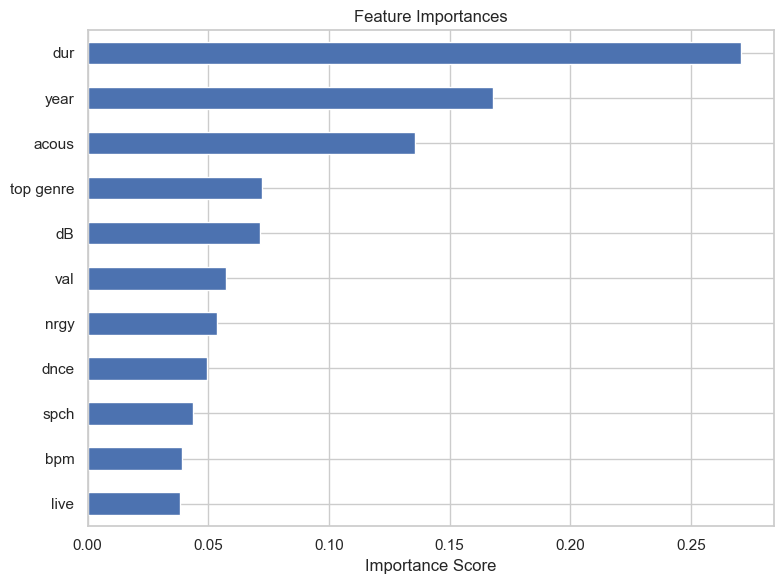

In [28]:
## Pseudocode:

## 1. Create a Random Forest model:
##    Use 100 trees
##    Set maximum depth to 10
##    Fix the random seed for reproducibility
## 
## 2. Train the model on the training data
## 
## 3. After training:
##    Get feature importance scores
##    Match each score to its feature name
## 
## 4. Sort the features by importance 
## 
## 5. Create a horizontal bar chart to show the sorted feature importances
## 
## 6. Add a title and label the x-axis as Importance Score
## 
## 7. Adjust the layout and display the plot



model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

We see that acous (acousticness), dB (loudness), and val (valence) are among the most influential features in predicting popularity in random forest model. Notwtithstanding, live, spch (speechiness), and bpm (tempo) contribute relatively less. Categorical information from top genre and temporal data from year also show moderate impact.

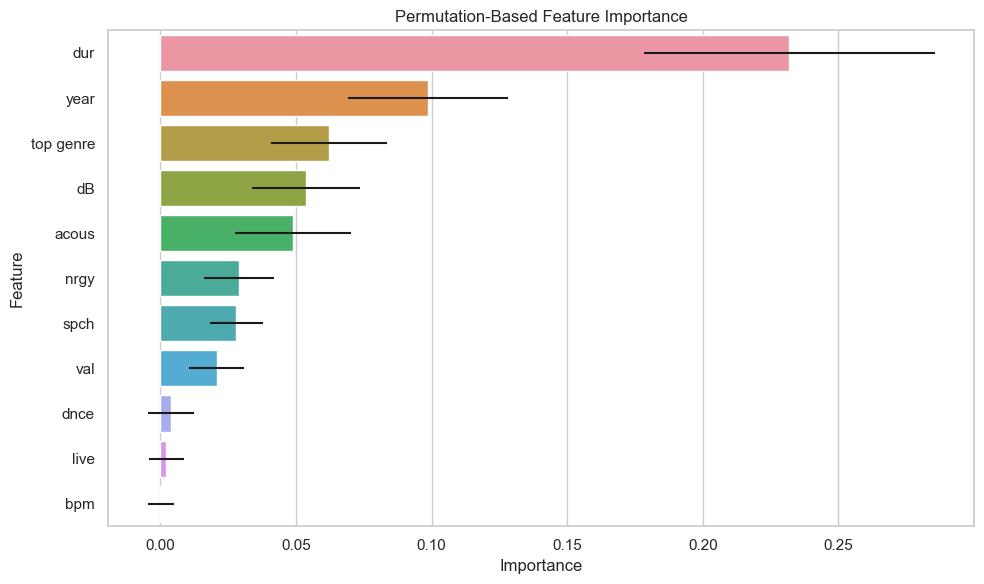

,Feature,Importance,Std
6,dur,0.231876,0.053598
10,year,0.098769,0.029556
9,top genre,0.062271,0.021410
3,dB,0.053571,0.019902
7,acous,0.048818,0.021503
1,nrgy,0.028896,0.012814
8,spch,0.027961,0.009667
5,val,0.020797,0.010173
2,dnce,0.003938,0.008549
4,live,0.002197,0.006595


In [29]:

## Pseudocode:
## 1. Use the trained Random Forest model
## 
## 2. Perform permutation importance
## 
## 
## 3. For each feature:
##    Calculate the average importance across all repetitions
##    Also calculate the standard deviation (error bar)
## 
## 4. Sort features by average importance (from most to least)
## 
## 5. Create a horizontal bar plot:
##    Y-axis: feature names
##    X-axis: importance scores
##    Show error bars using standard deviation
## 
## 6. Add title and format the layout
## 
## 7. Display the plot



# Run permutation importance on the trained Random Forest model
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)

# Format and sort results
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df, x='Importance', y='Feature', xerr=perm_df['Std'])
plt.title('Permutation-Based Feature Importance')
plt.tight_layout()
plt.show()

perm_df

Feature importance is a way to see which features (or variables) are most useful for making predictions in a model like Random Forest. The model gives a score to each feature based on how much it helps to split the data and make the predictions better. However sometimes it can prefer features that have many different values, even if they are not really important. On the other hand, permutation importance is a method to correct this problem. To do this, we randomly mix up (permute) the outcome (target) values many times and check how important each feature is in these random situations. Then, we compare the original importance score to these random scores. If the original score is much higher, the feature is probably truly important. This way, we get a more fair and trustworthy measure of which features really matter.

Permutation importance estimates how much each feature contributes to the model's performance by randomly shuffling its values and measuring the drop in prediction accuracy. Dur (duration) is by far the most important feature — permuting it causes the largest decrease in model performance. Year, top genre, and dB follow in importance, highlighting the influence of release timing, genre type, and loudness. Acous and nrgy also matter, but to a lesser degree. Meanwhile, bpm (tempo), live, and dnce have negligible impact, suggesting they contribute little to the model's prediction capability in this context.

In [30]:

## let us try to boost model accuracy by tweaking features

# Create new feature-engineered columns
df_fe = df_encoded.copy()

# Feature Engineering:
# 1. Tempo range bucket
df_fe['tempo_class'] = pd.cut(df_fe['bpm'], bins=[0, 90, 120, 150, 300],
                              labels=['slow', 'medium', 'fast', 'very_fast'])

# 2. High energy boolean
df_fe['high_energy'] = (df_fe['nrgy'] > 70).astype(int)

# 3. Acoustic vs Non-acoustic
df_fe['is_acoustic'] = (df_fe['acous'] > 50).astype(int)

# 4. Dance + energy interaction
df_fe['dance_energy_interaction'] = df_fe['dnce'] * df_fe['nrgy']

# Encode categorical feature
df_fe['tempo_class'] = df_fe['tempo_class'].astype(str)
df_fe['tempo_class'] = LabelEncoder().fit_transform(df_fe['tempo_class'])

# Select features for model
feature_set = final_crucial_features + [
    'tempo_class',
    'high_energy',
    'is_acoustic',
    'dance_energy_interaction'
]

X_fe = df_fe[feature_set]
y_fe = df_fe['pop']
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, random_state=42)

# Retrain Random Forest on new feature set
rf_fe = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_fe.fit(X_train_fe, y_train_fe)
y_pred_rf_fe = rf_fe.predict(X_test_fe)

# Evaluate improved model
evaluate_model("RandomForest + FE", y_test_fe, y_pred_rf_fe)

{'Model': 'RandomForest + FE',
 'R2 Score': 0.4713238201415776,
 'MAE': 7.772939607878539,
 'RMSE': 9.757154605371507}

To improve the model's ability to predict song popularity by creating new informative features derived from existing ones. This step applies a common data science practice.

We add following attributes:

tempo_class – A categorical variable classifying bpm into bins such as "slow", "medium", and "fast"- before 90 slow, 90-120 medium, 120-150 fast, 150+ very fast.

high_energy – A binary flag marking tracks with energy above 70.

is_acoustic – An indicator showing whether a song is highly acoustic.

dance_energy_interaction – A multiplicative interaction between danceability (dnce) and energy (nrgy), capturing similarity between these attributes.

These features were added to the already optimised crucial+spch feature set.

This is the highest R2 score yet achieved — meaning your Random Forest model now explains 47.1% of the variance in song popularity. In practical terms, the predictions are more accurate, and errors are slightly reduced, as shown by the improved MAE and RMSE.

This project aimed to explore the potential of machine learning models in predicting the popularity of songs based on a range of audio, genre, and temporal features. The analysis involved a combination of general exploratory data analysis, feature engineering, and evaluation of both linear and ensemble-based models.

Among all variables, features such as duration (dur), loudness (dB), valence, and acousticness are shown to be the strongest predictors. Permutation-based importance confirmed that dur had the greatest influence on model accuracy.

Linear models (Lasso, Ridge, ElasticNet) explained around 27–28% of the variance. Ensemble models performed significantly better while random forest had R2 = 0.47. Furthermore, Gradient Boosting and XGBoost also showed strong results, outperforming linear models.